# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
df = pd.read_csv('demo01_mod.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [164]:
X = df.drop('mau', axis=1)
y = df['mau']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
print("Treinamento - X:", X_train.shape, " y:", y_train.shape)
print("Validação - X:", X_valid.shape, " y:", y_valid.shape)

Treinamento - X: (11655, 15)  y: (11655,)
Validação - X: (4995, 15)  y: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [165]:
# 2.1
df_dummies = pd.get_dummies(df.select_dtypes(exclude=['number', 'bool']))
print (df_dummies)

       sexo_F  sexo_M  posse_de_veiculo_N  posse_de_veiculo_Y  \
0       False    True               False                True   
1        True   False                True               False   
2        True   False                True               False   
3       False    True               False                True   
4        True   False               False                True   
...       ...     ...                 ...                 ...   
16645    True   False                True               False   
16646    True   False                True               False   
16647   False    True               False                True   
16648   False    True               False                True   
16649    True   False                True               False   

       posse_de_imovel_N  posse_de_imovel_Y  tipo_renda_Commercial associate  \
0                  False               True                            False   
1                  False               True                

In [167]:
# 2.2
y_column = 'mau'
if y_column in df_dummies.columns:
    X = df_dummies.drop(y_column, axis=1)
    y = df_dummies[y_column]
else:
    X = df_dummies
    y = df[y_column]

In [168]:
# 2.3
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=4)

In [180]:
# 2.4
tree_model = DecisionTreeClassifier(random_state=4)

In [181]:
# 2.5
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

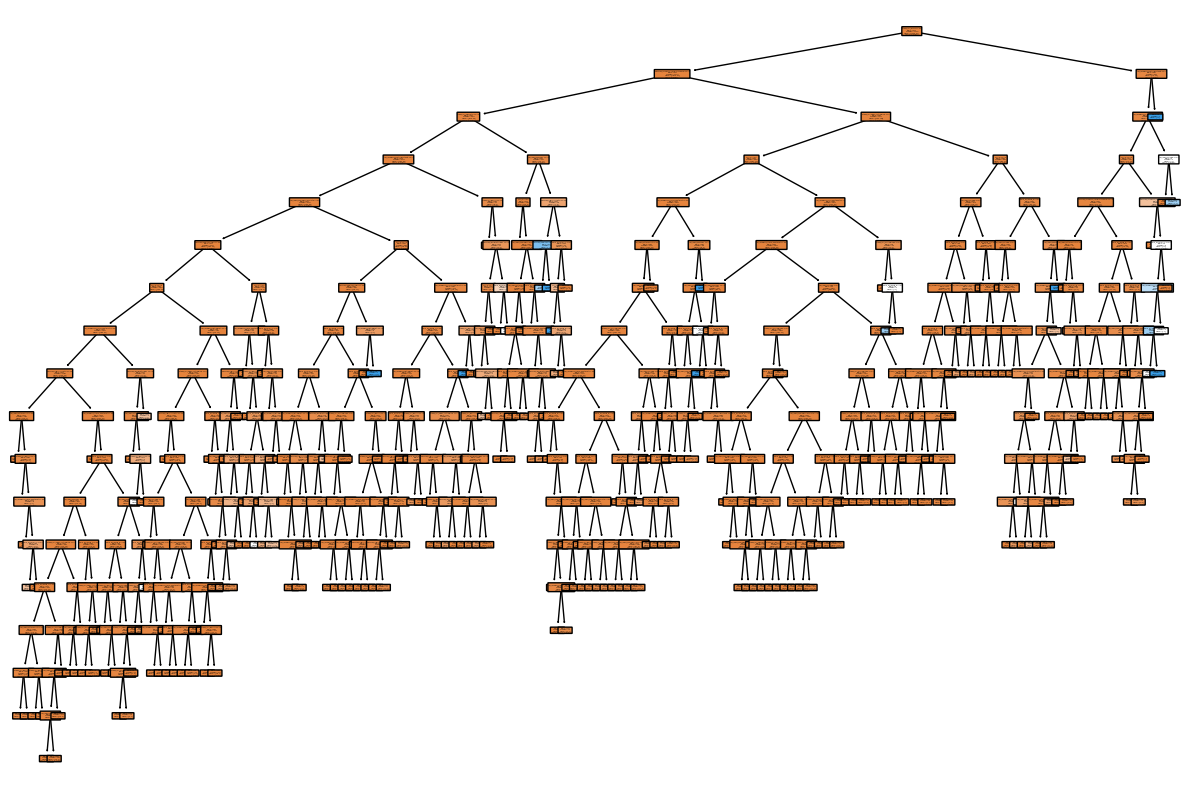

In [179]:
# 2.6
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=list(X.columns), class_names=['Aprovados', 'Reprovados'], rounded=True)
plt.show()

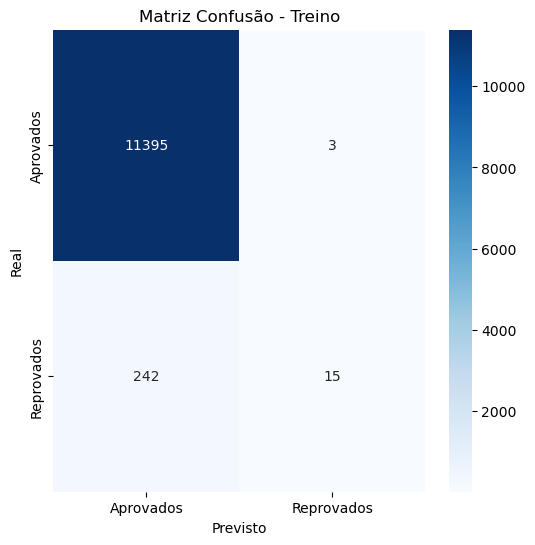

In [182]:
# 2.7
y_pred_train = tree_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão - Treino')
plt.show()

In [183]:
# 2.8
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Acurácia", accuracy_train)

Acurácia 0.978978978978979


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [244]:
# 1.
y_pred_test = tree_model.predict(X_val)

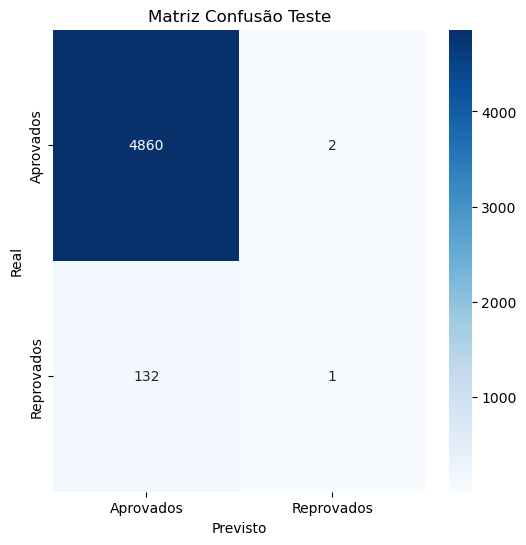

In [245]:
# 2.
cm_test = confusion_matrix(y_val, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão Teste')
plt.show()

In [246]:
# 3.
accuracy_test = accuracy_score(y_val, y_pred_test)
accuracy_train = accuracy_score(y_train, tree_model.predict(X_train))
print("Acurácia teste:", accuracy_test)
print("Acurácia treinamento:", accuracy_train)

Acurácia teste: 0.9731731731731732
Acurácia treinamento: 0.978978978978979


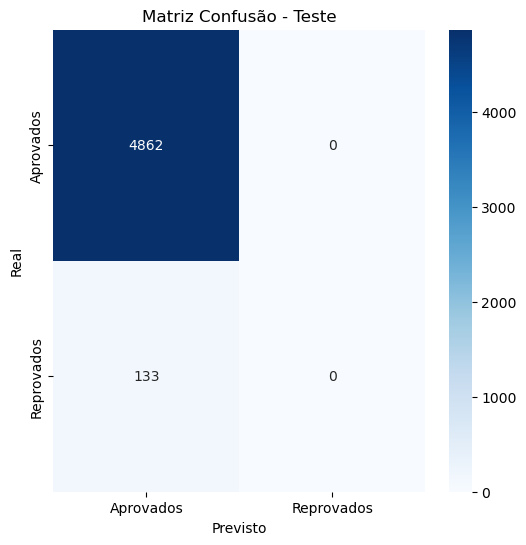

Proporção de proponentes classificados como 'maus': 0.0


In [247]:
# 4.
tree_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_model_new.fit(X_train, y_train)
y_pred_test_new = tree_model_new.predict(X_val)
cm_test_new = confusion_matrix(y_val, y_pred_test_new)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_new, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão - Teste')
plt.show()
proportion_maus = np.mean(y_pred_test_new == 1)
print("Proporção de proponentes classificados como 'maus':", proportion_maus)

In [248]:
# 5
accuracy_all_goods = np.mean(y_val == 0)
print("Acurácia se todos os contratos fossem classificados como 'bons':", accuracy_all_goods)

Acurácia se todos os contratos fossem classificados como 'bons': 0.9733733733733734
